# Logistic Regression
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [16]:
df=pd.read_csv('bank-full.csv',sep=';')
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [17]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [18]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

<Axes: >

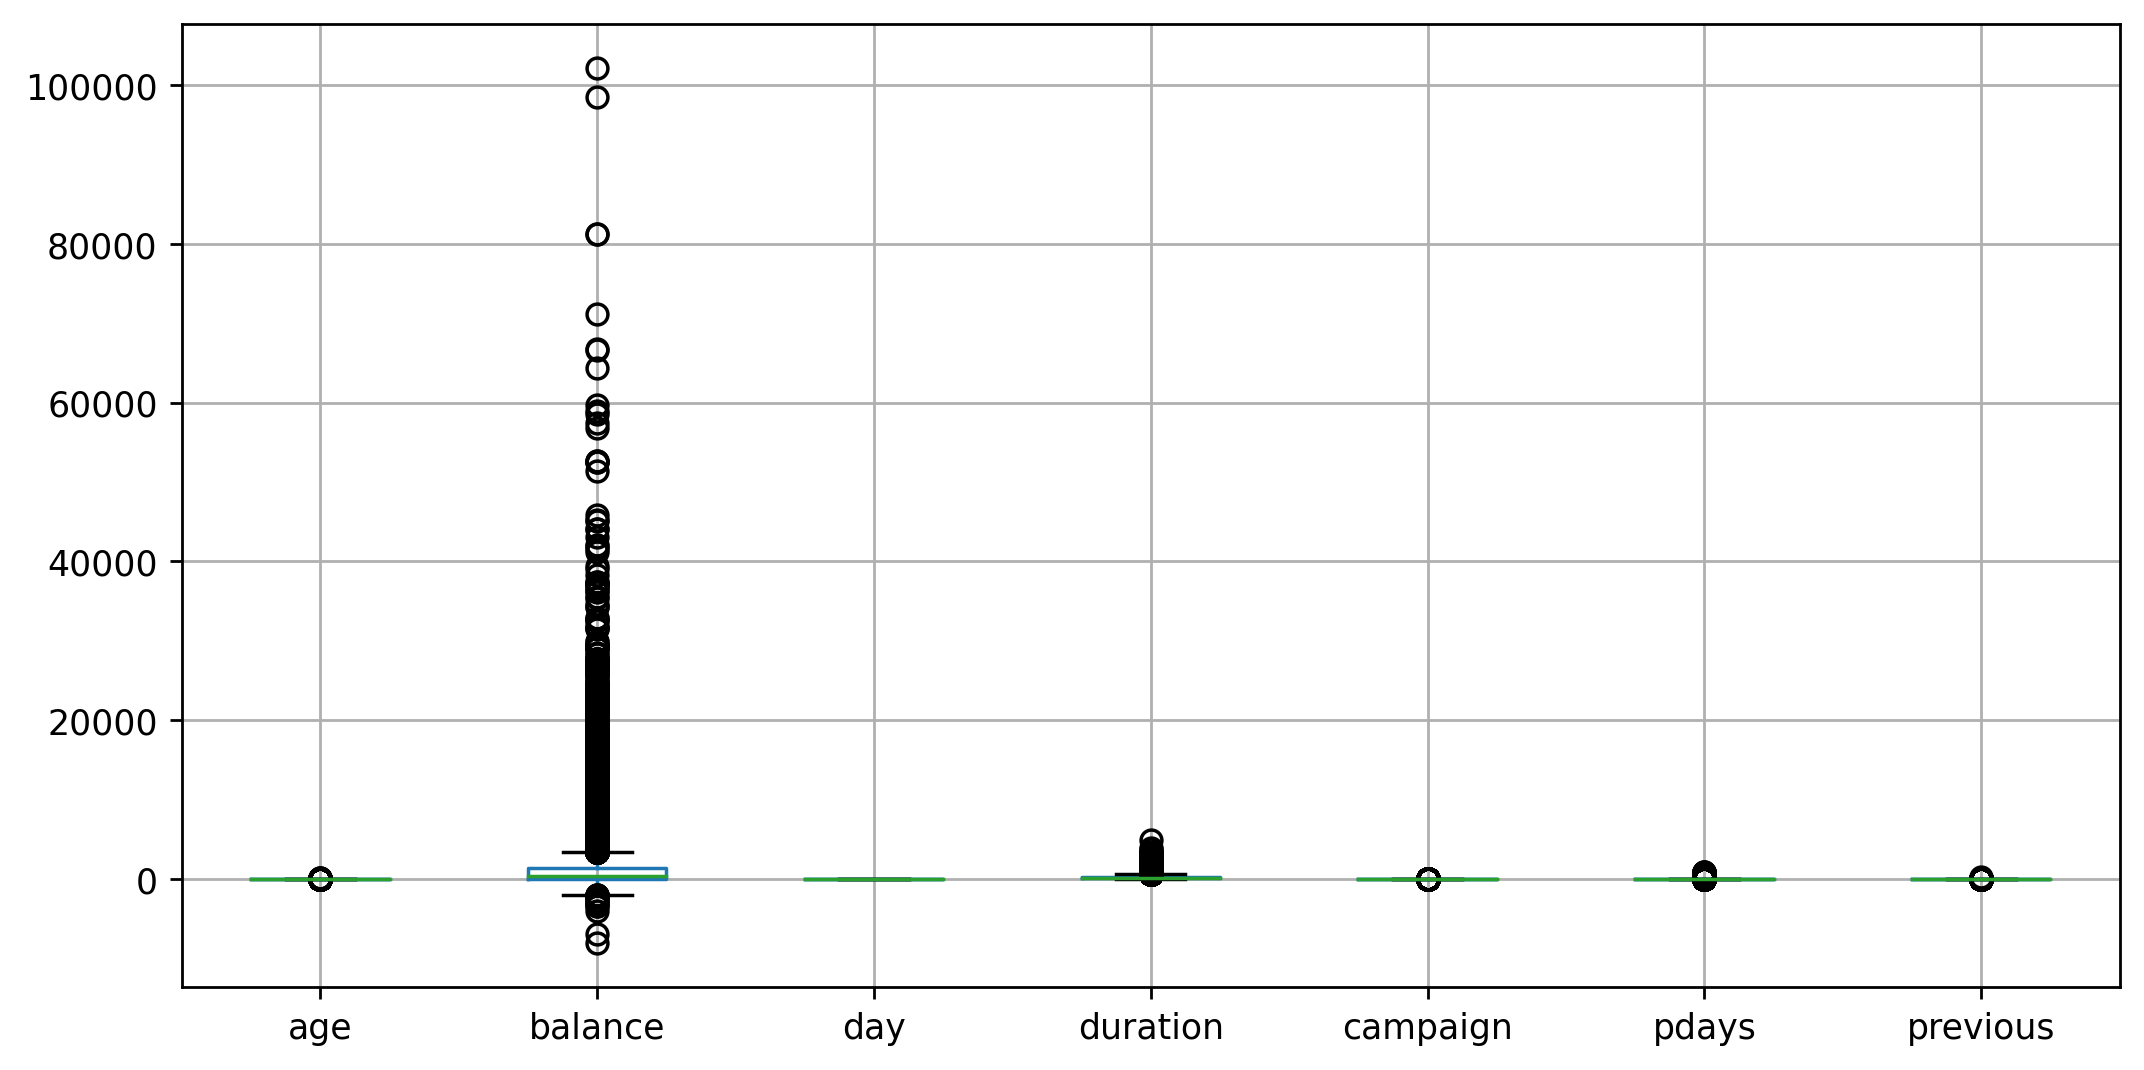

In [19]:
df.boxplot()

In [25]:
df.duplicated().sum()

0

In [ ]:
#Missing value calculation

In [27]:
for i in df.isna().sum():
    print((i/len(df))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


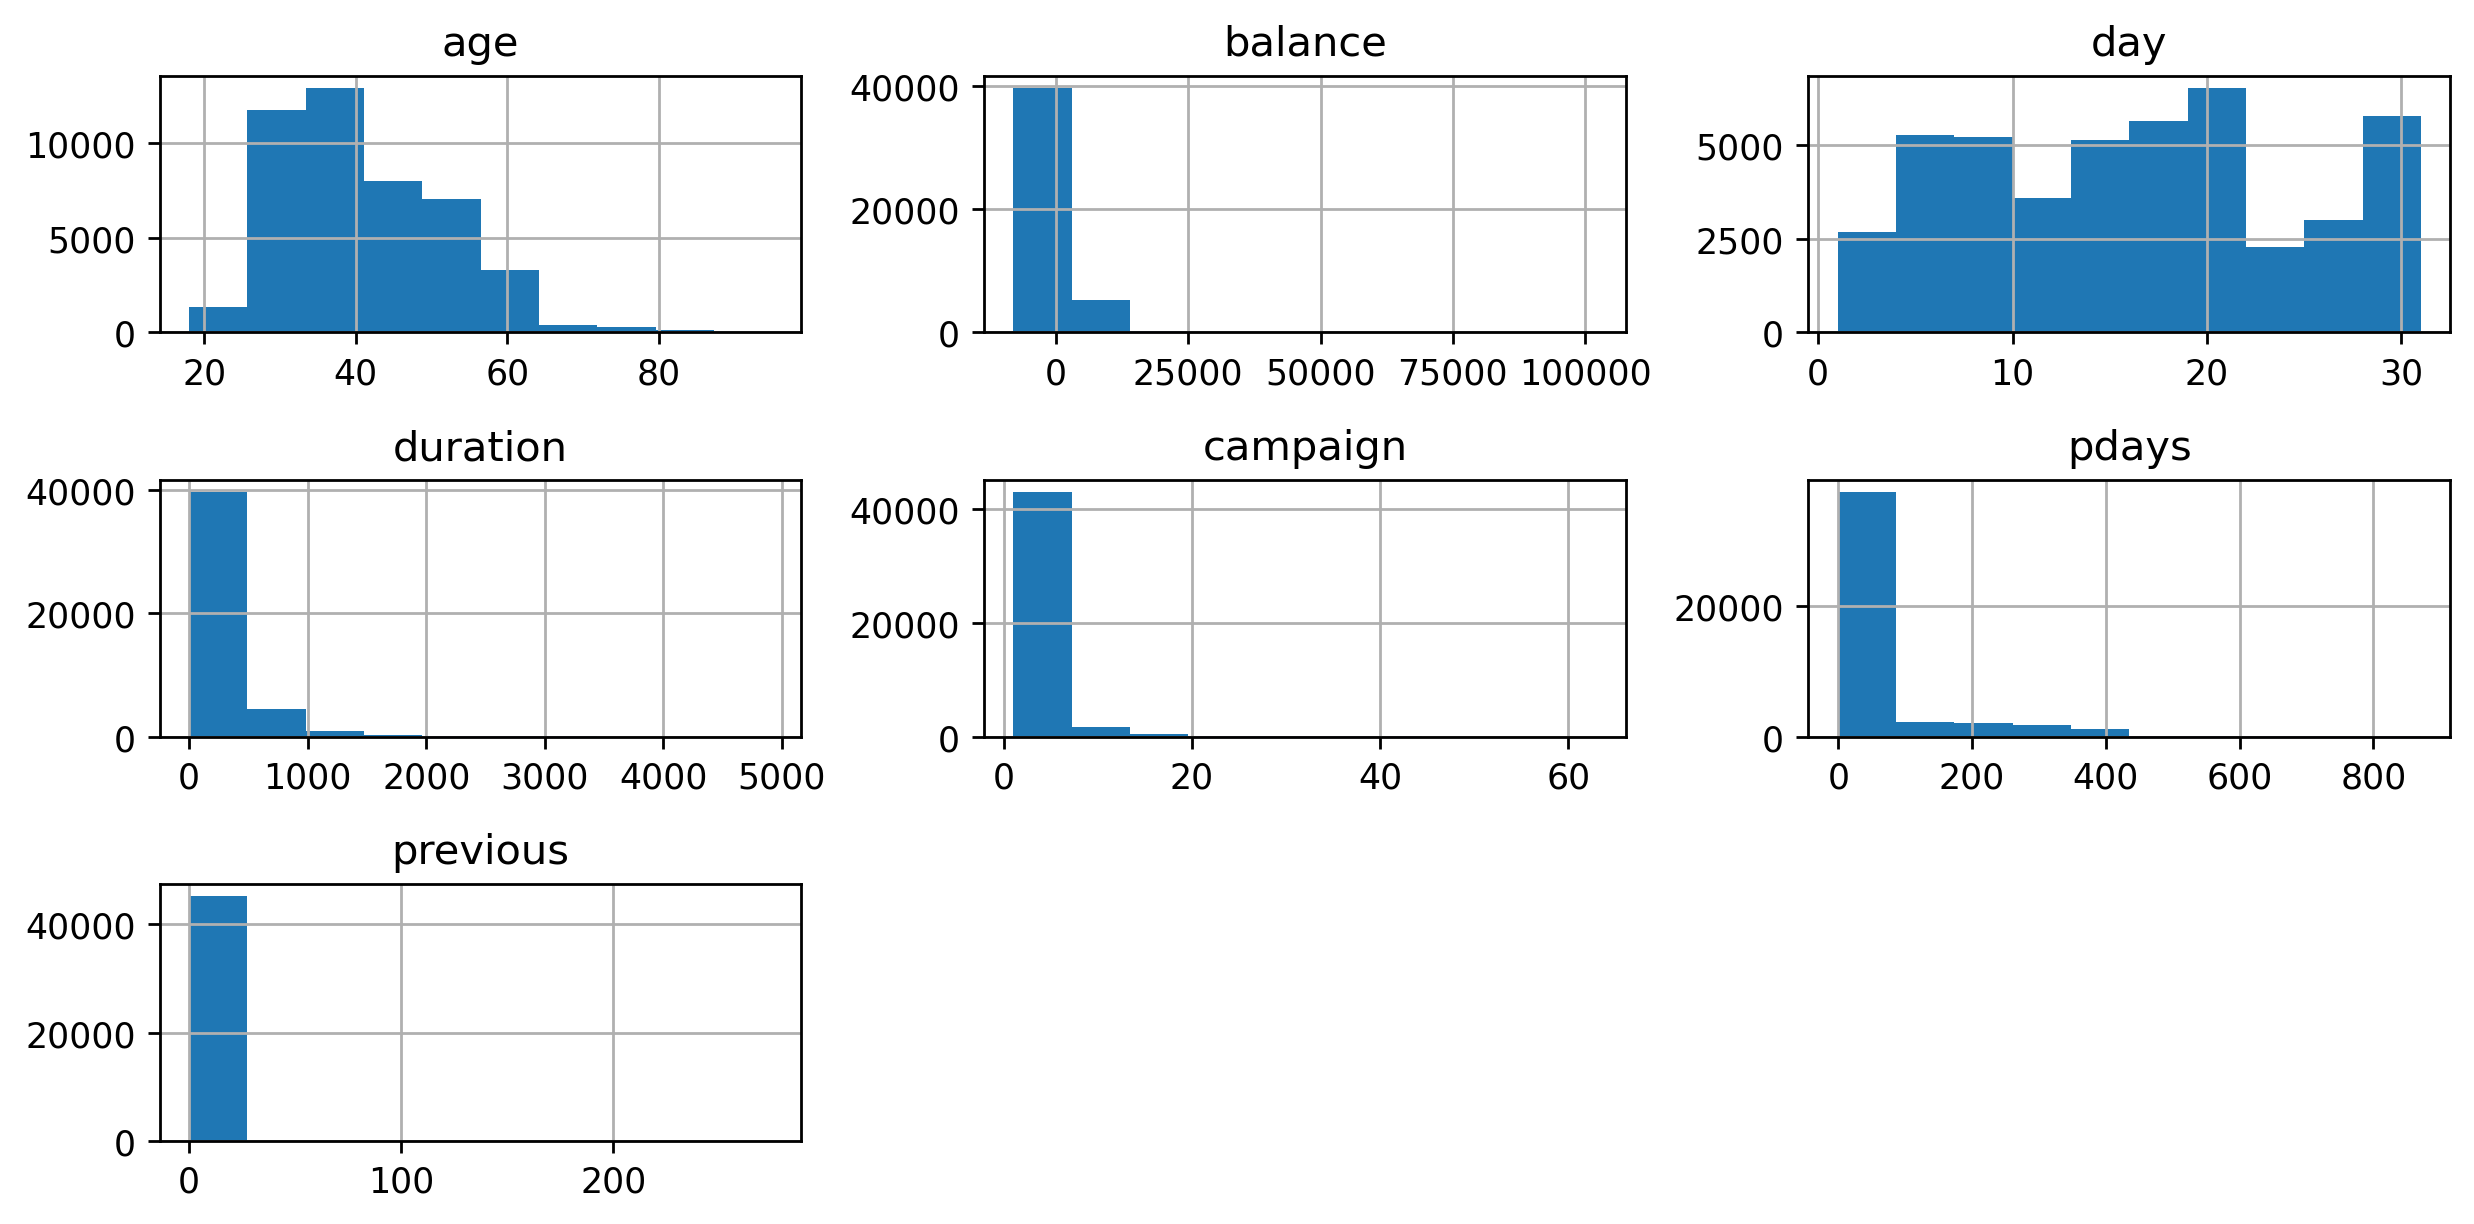

In [29]:
df.hist()
plt.tight_layout()

In [28]:
#Removal of outlier using capping method,using median

In [30]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [31]:
outlier_detection(df,'balance')

(-1962.0, 3462.0)

In [32]:
outlier_detection(df,'duration')

(-221.0, 643.0)

In [33]:
df[df['balance'] > 3462.0]

age          job   marital  education default  balance housing loan  \
34      51   management   married   tertiary      no    10635     yes   no   
65      51   management   married   tertiary      no     6530     yes   no   
69      35  blue-collar    single  secondary      no    12223     yes  yes   
70      57  blue-collar   married  secondary      no     5935     yes  yes   
186     40     services  divorced    unknown      no     4384     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45164   35     services   married   tertiary      no     4655      no   no   
45181   46  blue-collar   married  secondary      no     6879      no   no   
45185   60     services   married   tertiary      no     4256     yes   no   
45191   75      retired  divorced   tertiary      no     3810     yes   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
34      unknown    5   may       336         1     -1         0  unknown   no  
65      unknown    5   may        91         1     -1         0  unknown   no  
69      unknown    5   may       177         1     -1         0  unknown   no  
70      unknown    5   may       258         1     -1         0  unknown   no  
186     unknown    5   may       315         1     -1         0  unknown   no  
...         ...  ...   ...       ...       ...    ...       ...      ...  ...  
45164  cellular    9   nov       111         2     -1         0  unknown   no  
45181  cellular   15   nov        74         2    118         3  failure   no  
45185  cellular   16   nov       200         1     92         4  success  yes  
45191  cellular   16   nov       262         1    183         1  failure  yes  
45208  cellular   17   nov      1127         5    184         3  success  yes  

[4712 rows x 17 columns]

In [34]:
df.loc[df['balance'] > 3462.0,'balance'] = 3462.0
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     3462      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [36]:
df[df['duration'] > 643.0]

age          job   marital  education default  balance housing loan  \
37      53   technician   married  secondary      no       -3      no   no   
43      54      retired   married  secondary      no      529     yes   no   
53      42       admin.    single  secondary      no      -76     yes   no   
59      46     services   married    primary      no      179     yes   no   
61      53   technician  divorced  secondary      no      989     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45124   27  blue-collar    single    primary      no      232     yes   no   
45199   34  blue-collar    single  secondary      no     1475     yes   no   
45200   38   technician   married  secondary      no      557     yes   no   
45206   51   technician   married   tertiary      no      825      no   no   
45208   72      retired   married  secondary      no     3462      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
37      unknown    5   may      1666         1     -1         0  unknown   no  
43      unknown    5   may      1492         1     -1         0  unknown   no  
53      unknown    5   may       787         1     -1         0  unknown   no  
59      unknown    5   may      1778         1     -1         0  unknown   no  
61      unknown    5   may       812         1     -1         0  unknown   no  
...         ...  ...   ...       ...       ...    ...       ...      ...  ...  
45124  cellular   26   oct       701         2     -1         0  unknown  yes  
45199  cellular   16   nov      1166         3    530        12    other   no  
45200  cellular   16   nov      1556         4     -1         0  unknown  yes  
45206  cellular   17   nov       977         3     -1         0  unknown  yes  
45208  cellular   17   nov      1127         5    184         3  success  yes  

[3235 rows x 17 columns]

In [37]:
df.loc[df['duration'] > 643.0,'duration'] = 643.0
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     3462      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       643         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov       643         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [38]:
df[df['duration'] > 643.0]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

In [41]:
df.describe()

age       balance           day      duration      campaign  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    933.264692     15.806419    234.939307      2.763841   
std       10.618762   1178.527538      8.322476    176.749932      3.098021   
min       18.000000  -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000     72.000000      8.000000    103.000000      1.000000   
50%       39.000000    448.000000     16.000000    180.000000      2.000000   
75%       48.000000   1428.000000     21.000000    319.000000      3.000000   
max       95.000000   3462.000000     31.000000    643.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

<Axes: >

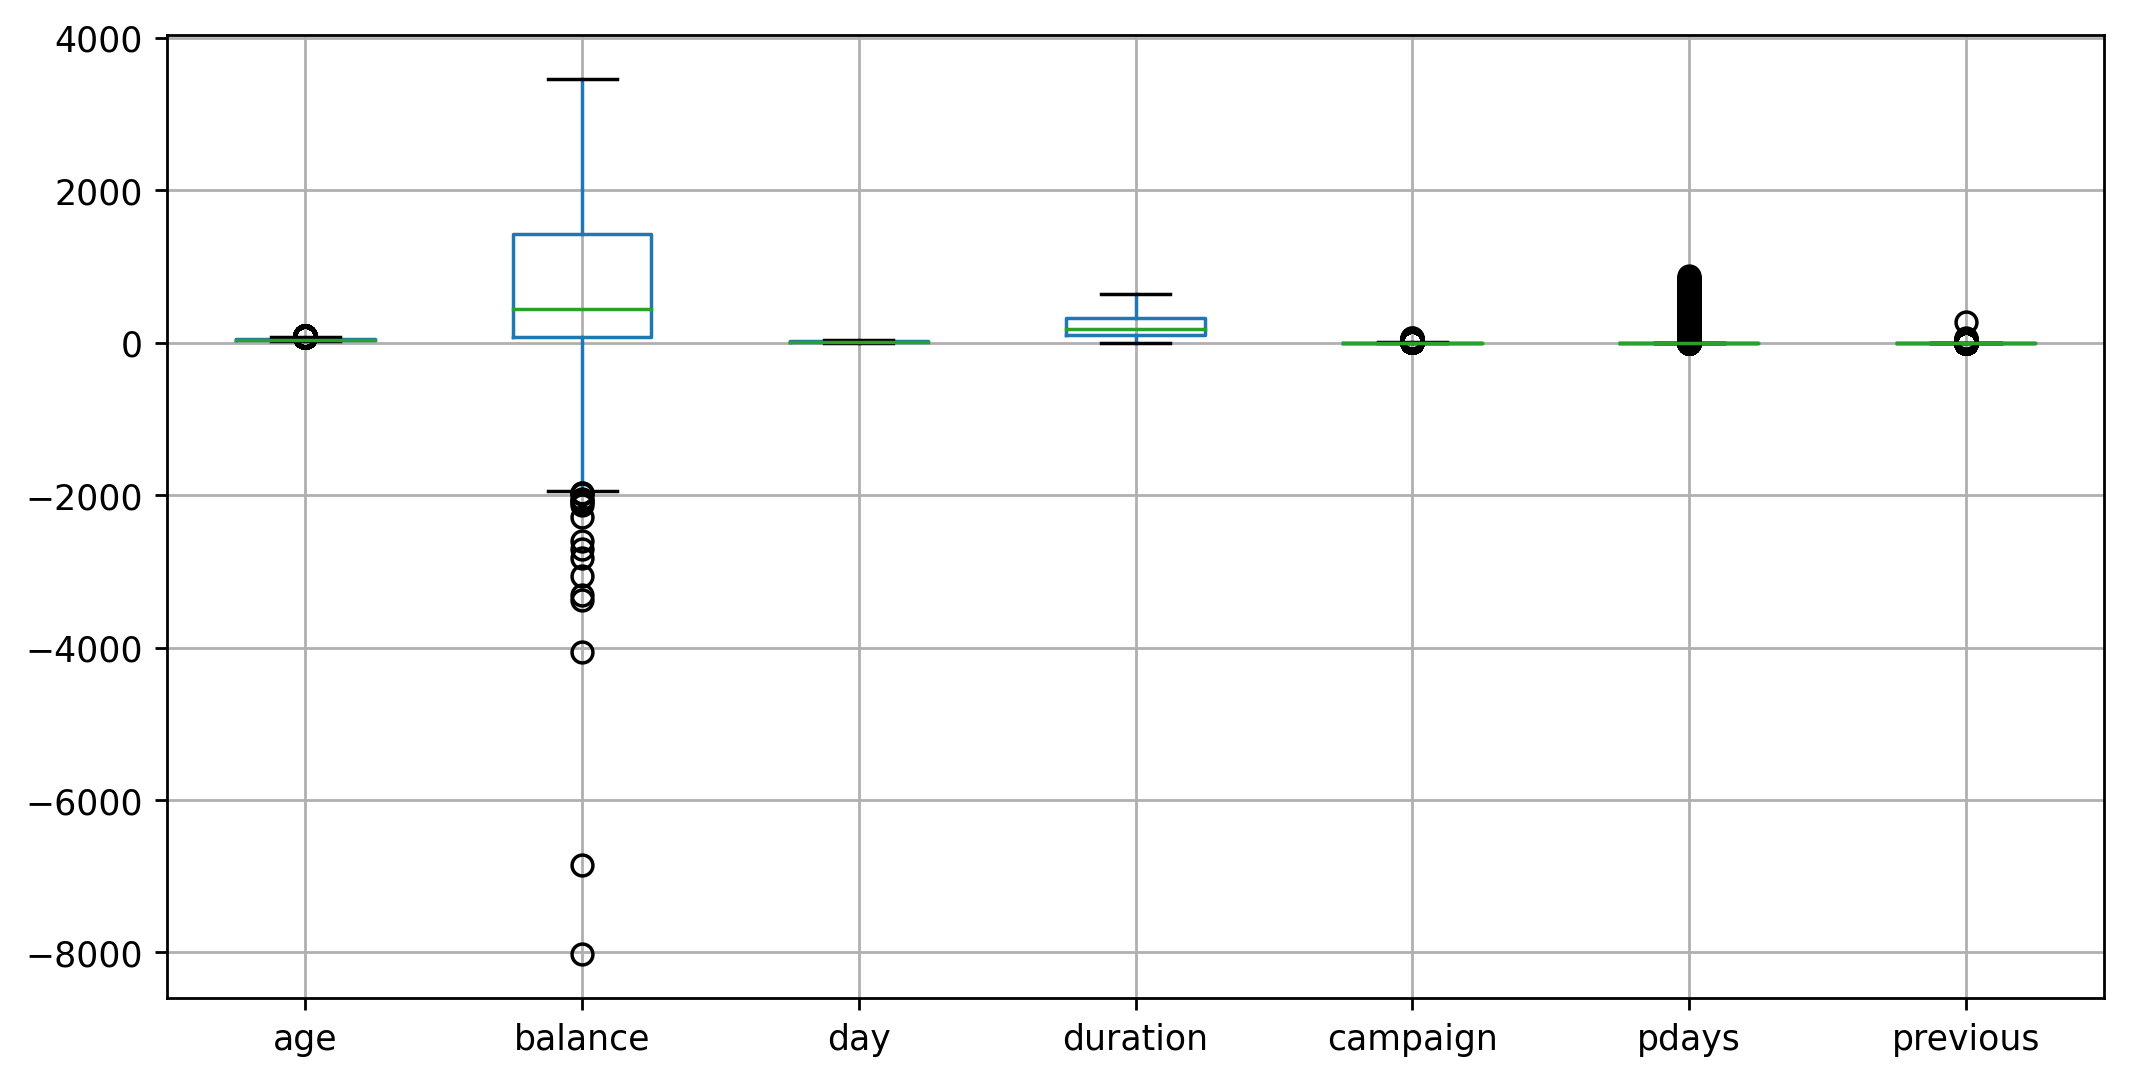

In [42]:
df.boxplot()

In [46]:
df[df['balance'] < -1962.0]

age            job   marital  education default  balance housing loan  \
1896    57  self-employed   married   tertiary     yes    -3313     yes  yes   
7413    43     management   married   tertiary     yes    -3372     yes   no   
7756    49     management  divorced   tertiary      no    -2049     yes   no   
11655   56     management  divorced   tertiary     yes    -1968      no   no   
12909   26    blue-collar    single  secondary     yes    -8019      no  yes   
13687   38    blue-collar  divorced  secondary      no    -2093     yes  yes   
13708   49   entrepreneur   married  secondary      no    -1965      no  yes   
14434   51     management  divorced   tertiary      no    -2282     yes  yes   
15682   49     management   married   tertiary     yes    -6847      no  yes   
17159   51   entrepreneur   married  secondary     yes    -2082      no  yes   
18573   40     technician   married   tertiary     yes    -2827     yes  yes   
20317   35     management    single   tertiary     yes    -1980     yes  yes   
25119   49    blue-collar    single    primary     yes    -2604     yes   no   
25240   43       services   married    primary      no    -2122     yes  yes   
31509   52     management   married   tertiary      no    -2712     yes  yes   
32713   39  self-employed   married   tertiary      no    -3058     yes  yes   
38736   60     management  divorced   tertiary      no    -4057     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
1896     unknown    9   may       153         1     -1         0  unknown   no  
7413     unknown   29   may       386         2     -1         0  unknown   no  
7756     unknown   30   may       169         3     -1         0  unknown   no  
11655    unknown   20   jun        60         3     -1         0  unknown   no  
12909   cellular    7   jul       299         3     -1         0  unknown   no  
13687    unknown    9   jul       120         3     -1         0  unknown   no  
13708  telephone   10   jul       317         2     -1         0  unknown   no  
14434   cellular   14   jul       301         6     -1         0  unknown   no  
15682   cellular   21   jul       206         1     -1         0  unknown   no  
17159   cellular   28   jul       123         6     -1         0  unknown   no  
18573   cellular   31   jul       643         1     -1         0  unknown   no  
20317   cellular   11   aug       227         1     -1         0  unknown   no  
25119   cellular   18   nov       142         1     -1         0  unknown   no  
25240   cellular   18   nov       141         3     -1         0  unknown   no  
31509   cellular    2   apr       253         1     -1         0  unknown   no  
32713   cellular   17   apr       643         3     -1         0  unknown  yes  
38736   cellular   18   may       242         6     -1         0  unknown   no

In [47]:
df.loc[df['balance']  < -1962.0,'balance'] = -1962.0
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     3462      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       643         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov       643         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

<Axes: >

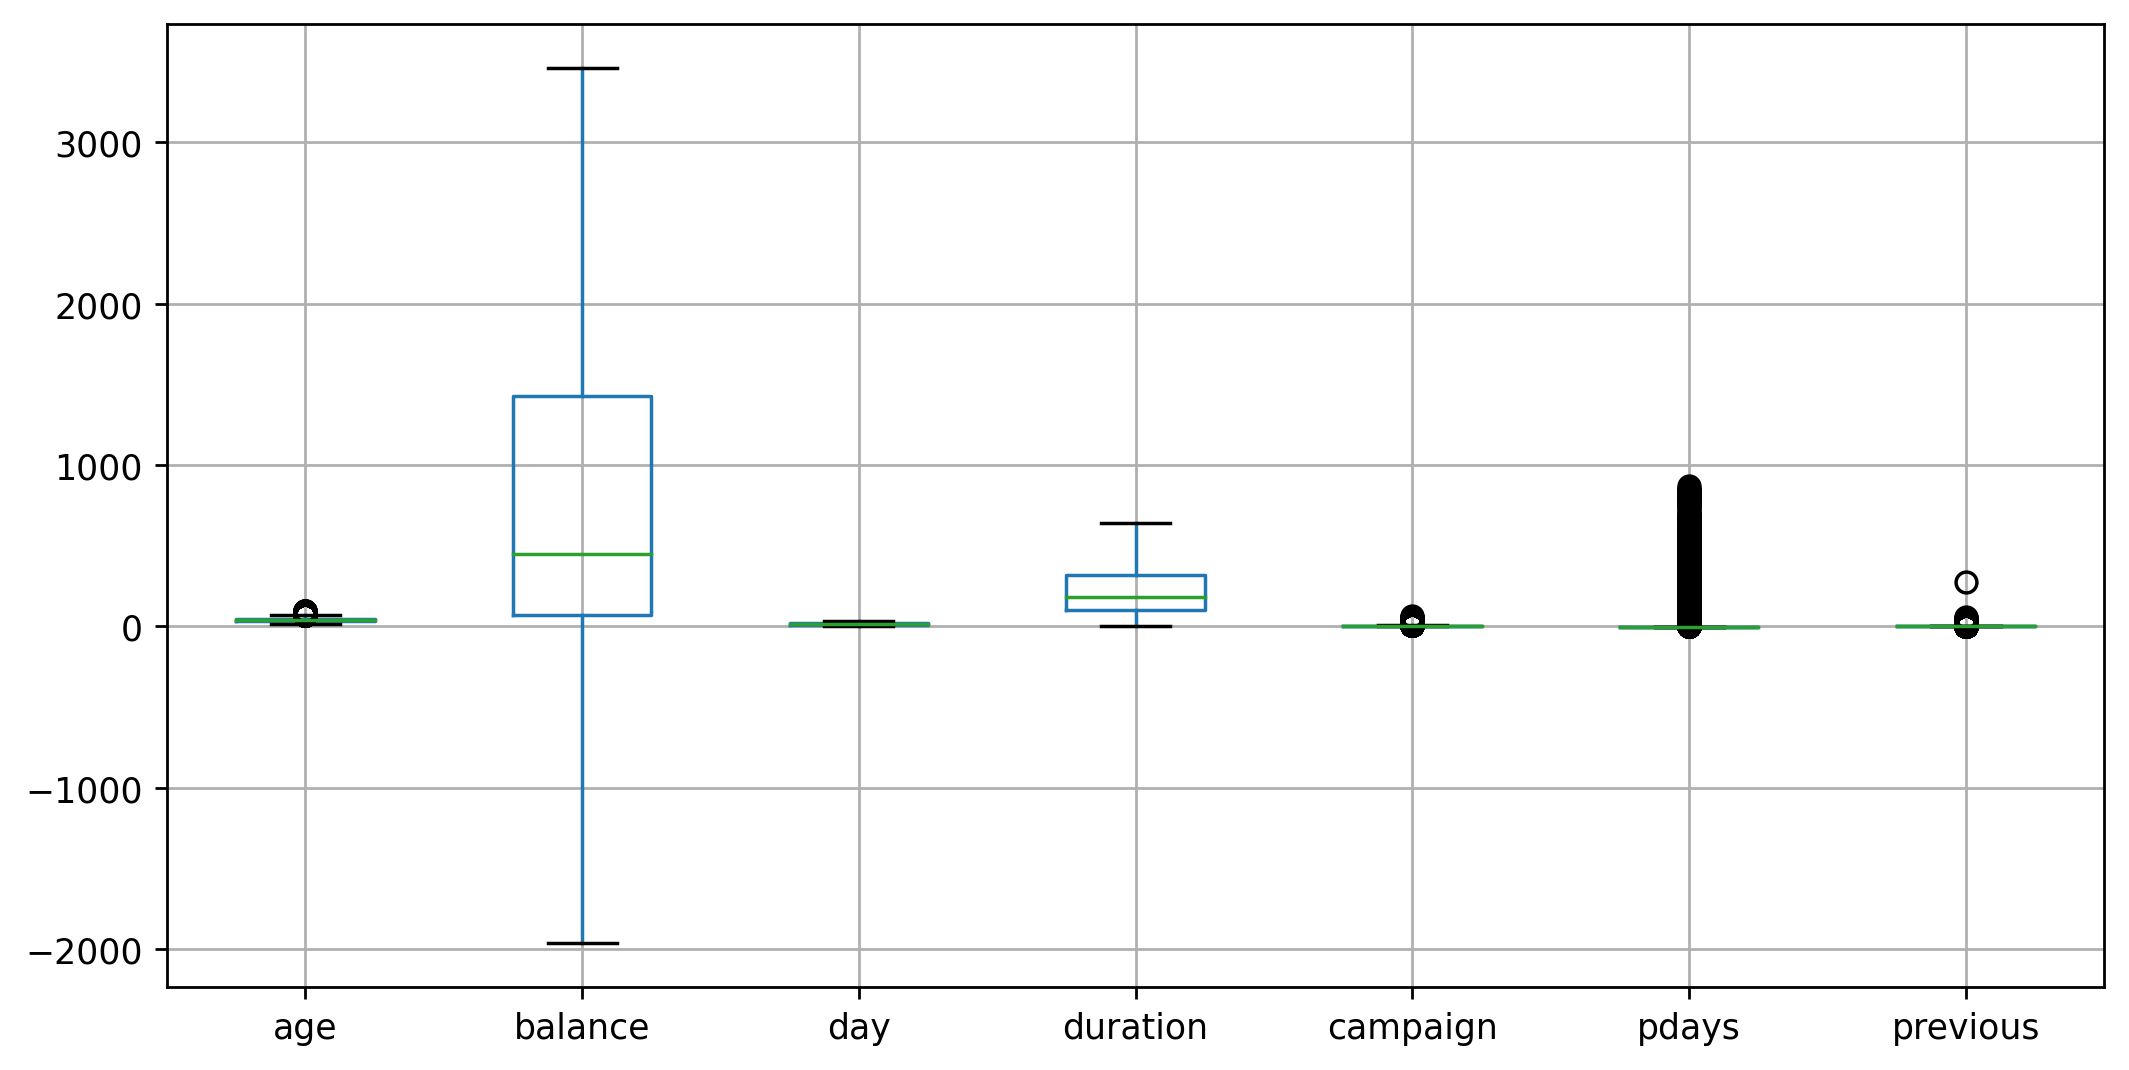

In [48]:
df.boxplot()

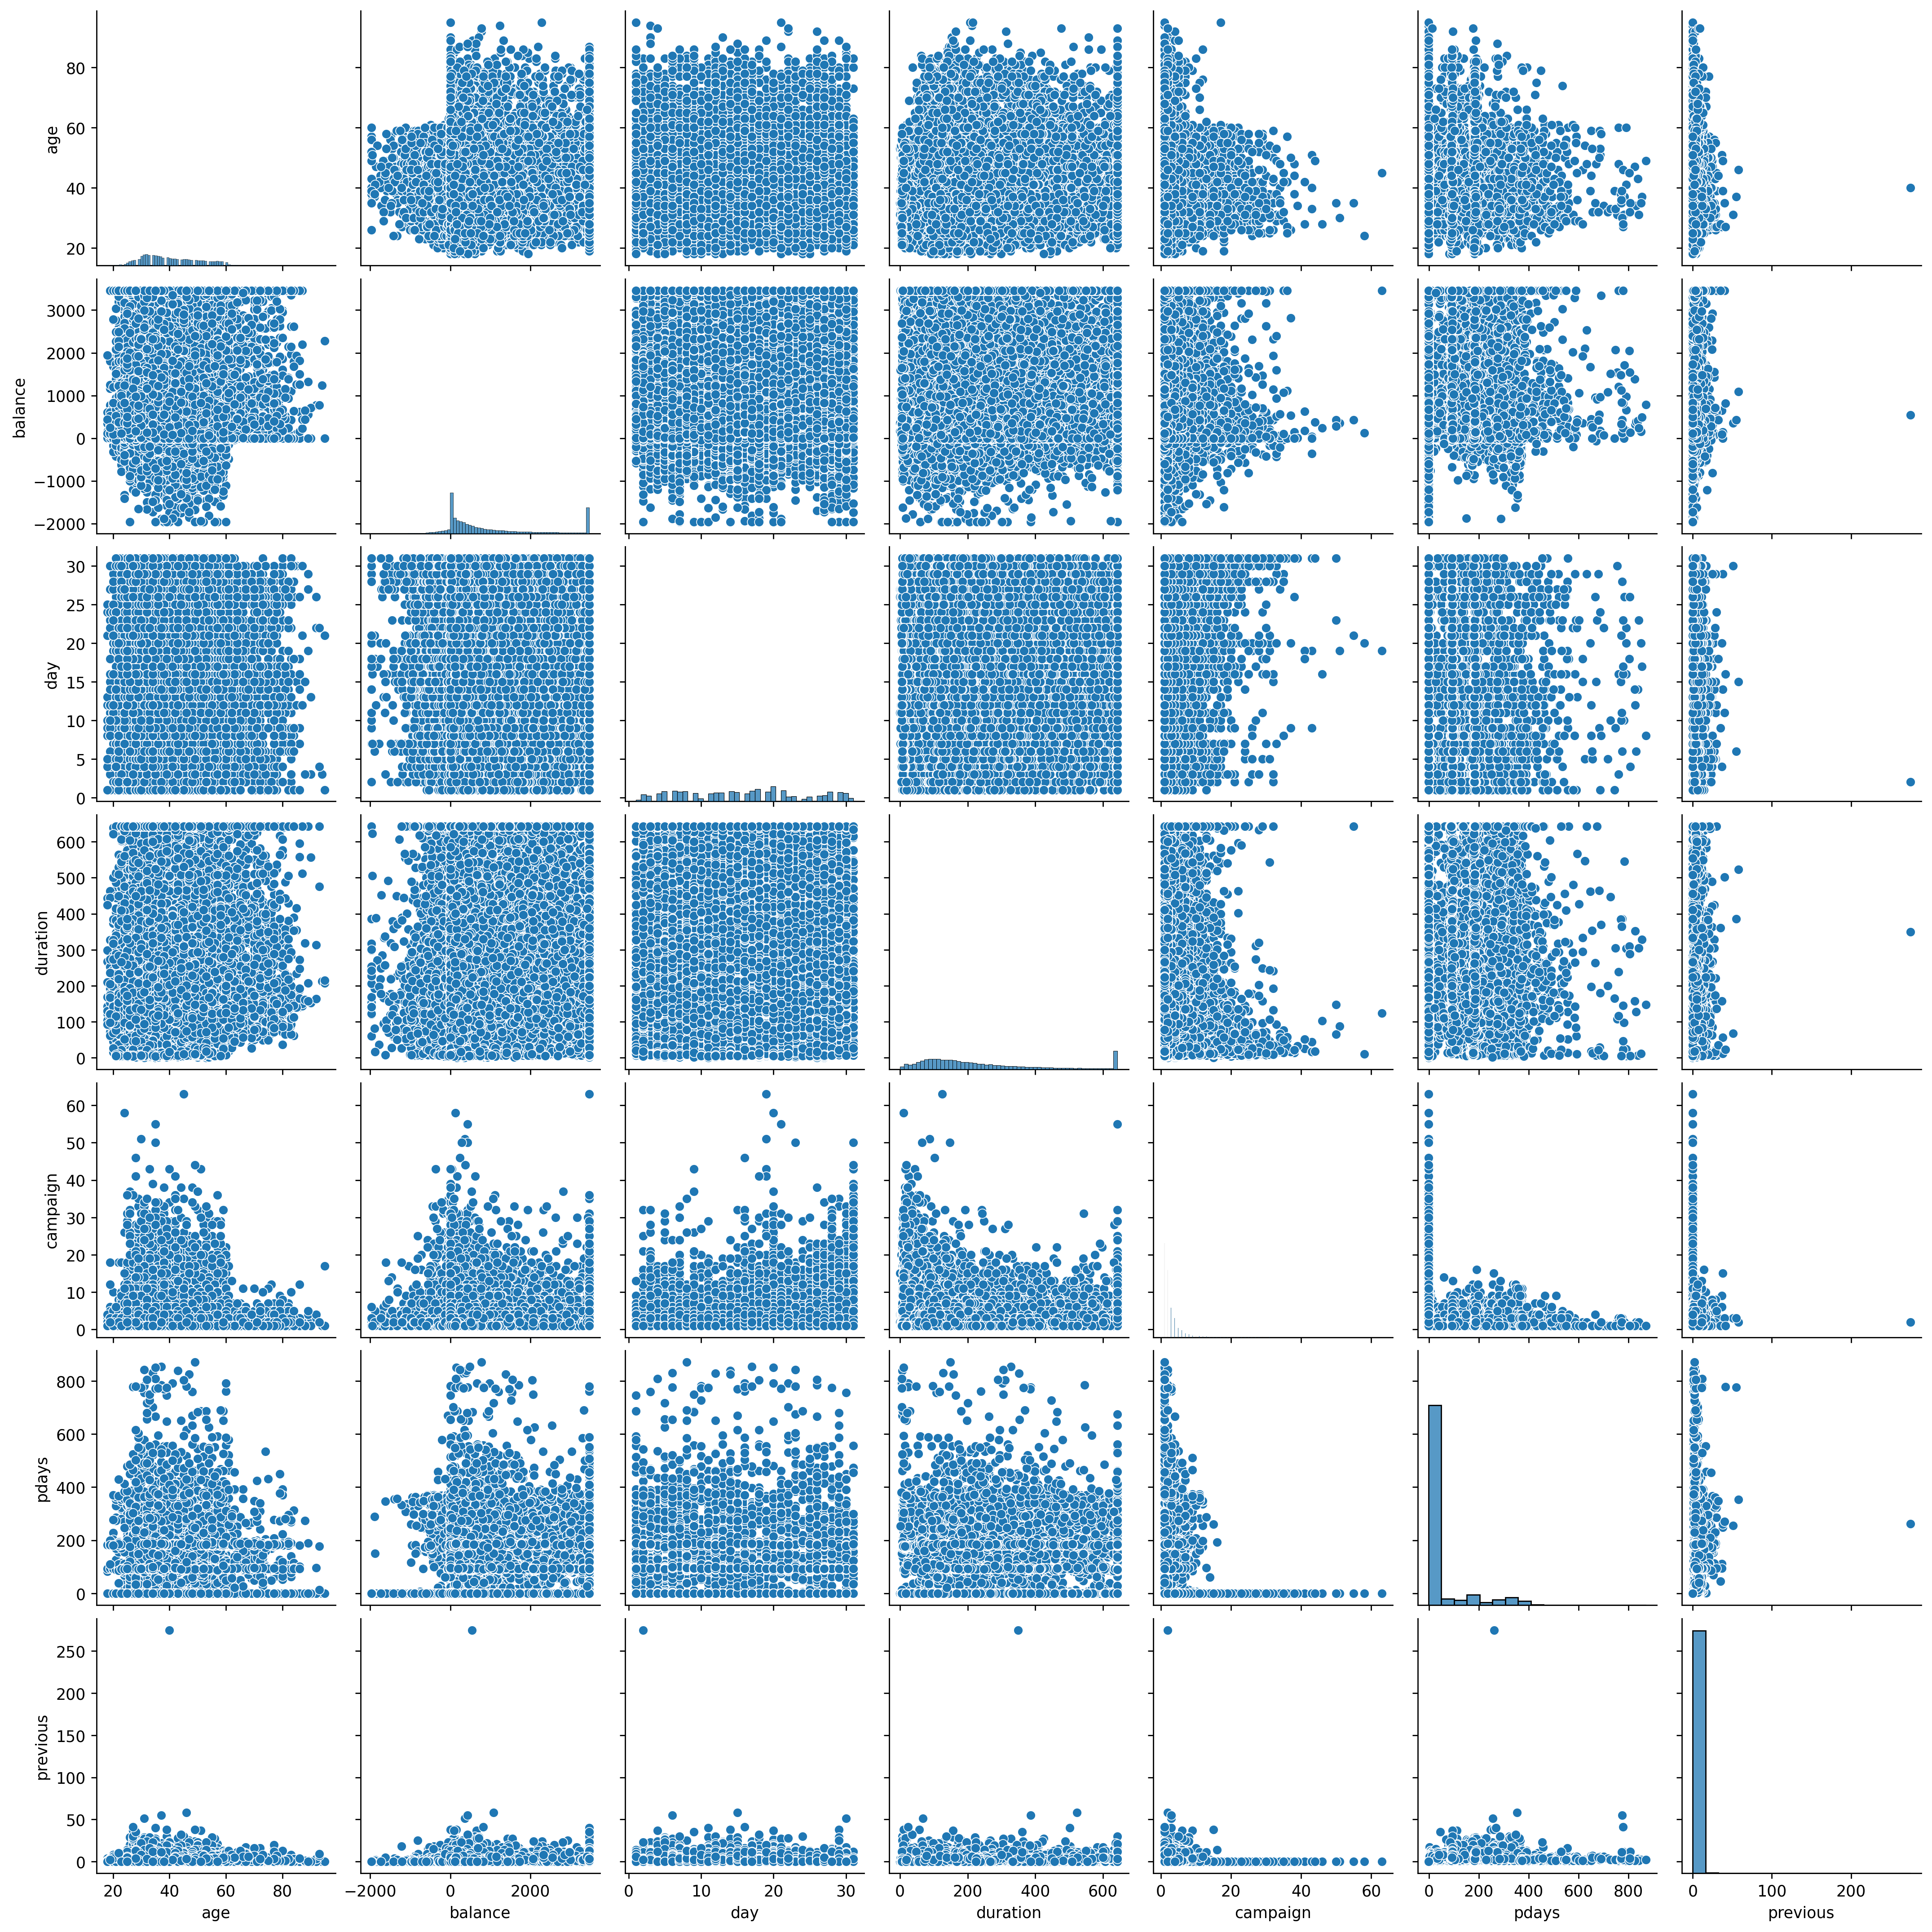

In [50]:
sns.pairplot(df)

In [51]:
df.corr(numeric_only=True)

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.122118 -0.009120 -0.011735  0.004760 -0.023758  0.001288
balance   0.122118  1.000000  0.009971  0.041942 -0.029168  0.017160  0.035308
day      -0.009120  0.009971  1.000000 -0.039285  0.162490 -0.093044 -0.051710
duration -0.011735  0.041942 -0.039285  1.000000 -0.118634  0.008057  0.007081
campaign  0.004760 -0.029168  0.162490 -0.118634  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.017160 -0.093044  0.008057 -0.088628  1.000000  0.454820
previous  0.001288  0.035308 -0.051710  0.007081 -0.032855  0.454820  1.000000

<Axes: >

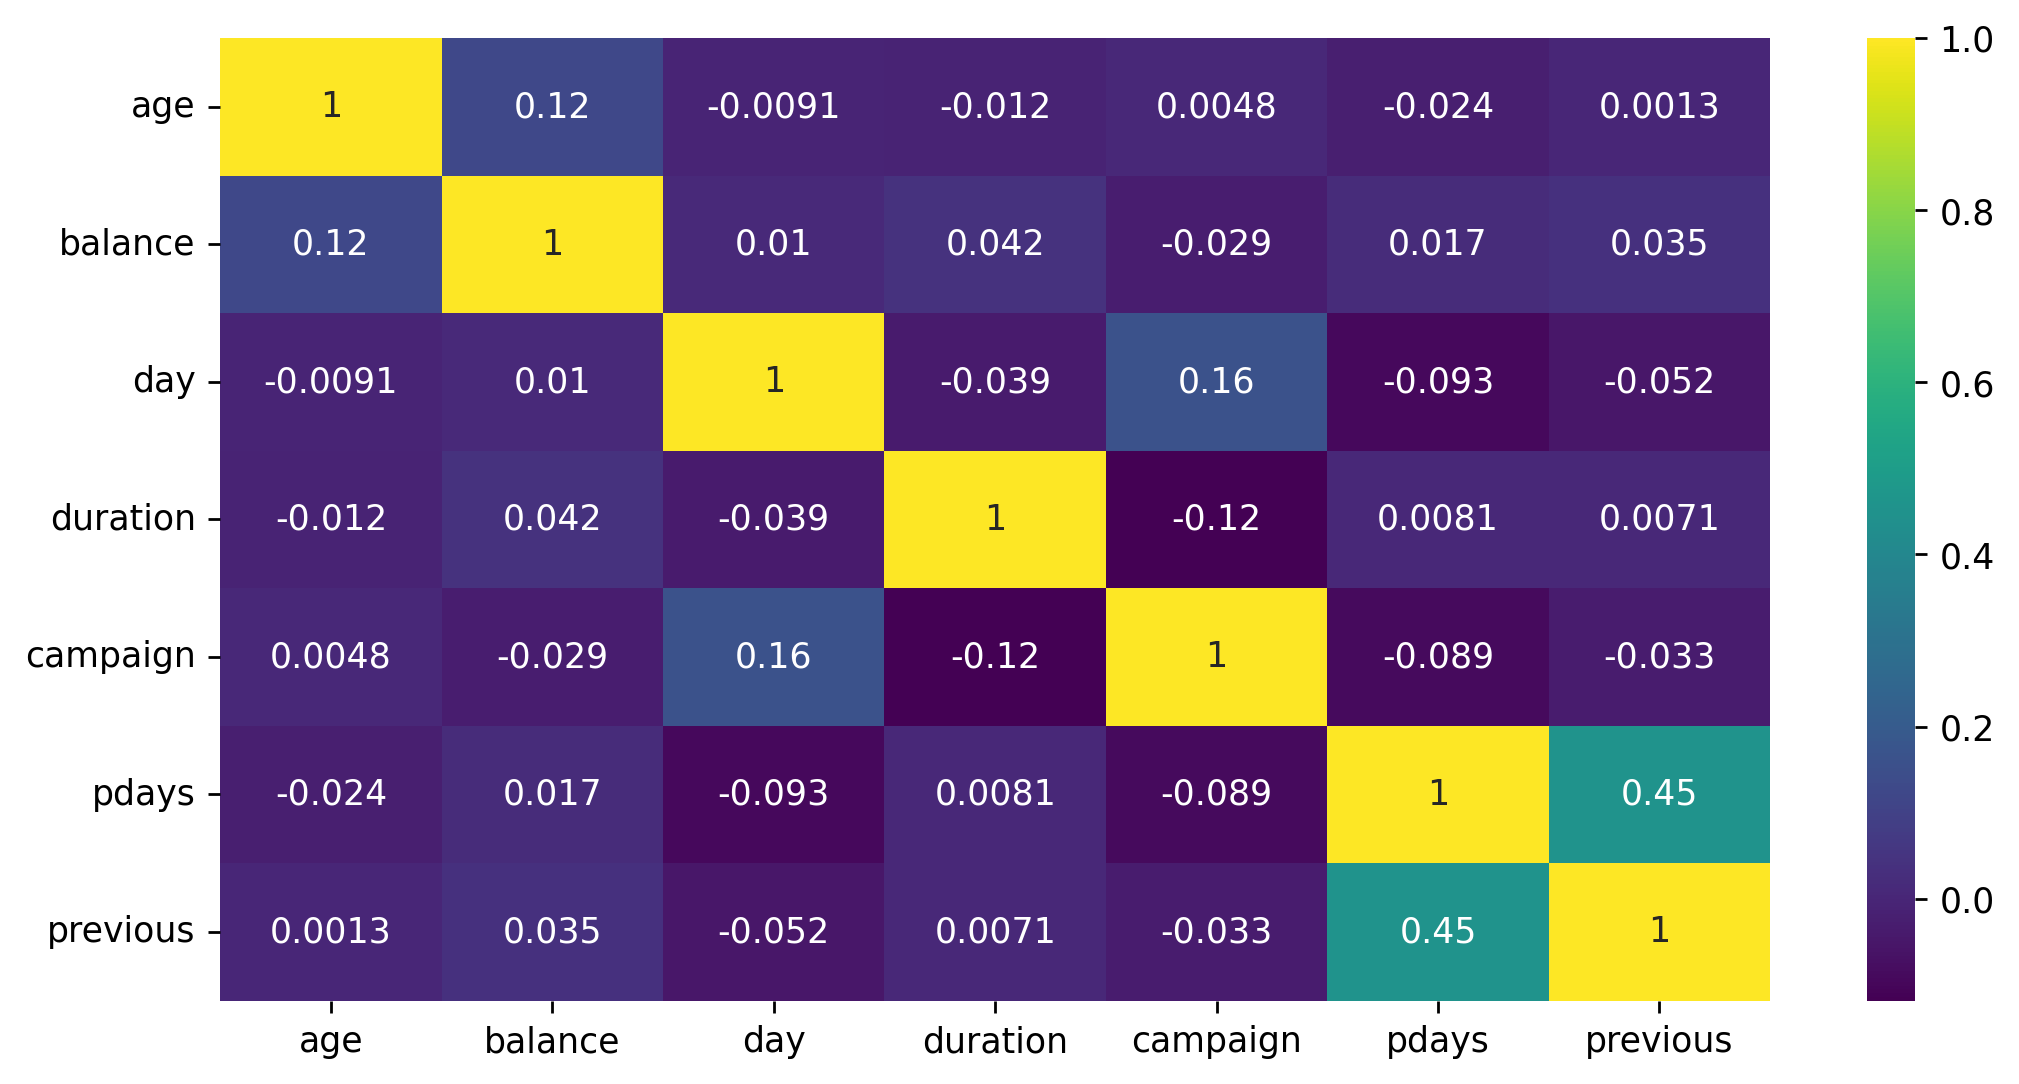

In [52]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

In [53]:
# Encoding

In [54]:
df.select_dtypes([int,float])

age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       643         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     3462   17       643         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]

In [55]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [56]:
df[cat_cols]

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome    y  
0       may  unknown   no  
1       may  unknown   no  
2       may  unknown   no  
3       may  unknown   no  
4       may  unknown   no  
...     ...      ...  ...  
45206   nov  unknown  yes  
45207   nov  unknown  yes  
45208   nov  success  yes  
45209   nov  unknown   no  
45210   nov    other   no  

[45211 rows x 10 columns]

In [57]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])
df[cat_cols]

job  marital  education  default  housing  loan  contact  month  \
0       4.0      1.0        2.0      0.0      1.0   0.0      2.0    8.0   
1       9.0      2.0        1.0      0.0      1.0   0.0      2.0    8.0   
2       2.0      1.0        1.0      0.0      1.0   1.0      2.0    8.0   
3       1.0      1.0        3.0      0.0      1.0   0.0      2.0    8.0   
4      11.0      2.0        3.0      0.0      0.0   0.0      2.0    8.0   
...     ...      ...        ...      ...      ...   ...      ...    ...   
45206   9.0      1.0        2.0      0.0      0.0   0.0      0.0    9.0   
45207   5.0      0.0        0.0      0.0      0.0   0.0      0.0    9.0   
45208   5.0      1.0        1.0      0.0      0.0   0.0      0.0    9.0   
45209   1.0      1.0        1.0      0.0      0.0   0.0      1.0    9.0   
45210   2.0      1.0        1.0      0.0      0.0   0.0      0.0    9.0   

       poutcome    y  
0           3.0  0.0  
1           3.0  0.0  
2           3.0  0.0  
3           3.0  0.0  
4           3.0  0.0  
...         ...  ...  
45206       3.0  1.0  
45207       3.0  1.0  
45208       2.0  1.0  
45209       3.0  0.0  
45210       1.0  0.0  

[45211 rows x 10 columns]

In [58]:
df

age   job  marital  education  default  balance  housing  loan  \
0       58   4.0      1.0        2.0      0.0     2143      1.0   0.0   
1       44   9.0      2.0        1.0      0.0       29      1.0   0.0   
2       33   2.0      1.0        1.0      0.0        2      1.0   1.0   
3       47   1.0      1.0        3.0      0.0     1506      1.0   0.0   
4       33  11.0      2.0        3.0      0.0        1      0.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
45206   51   9.0      1.0        2.0      0.0      825      0.0   0.0   
45207   71   5.0      0.0        0.0      0.0     1729      0.0   0.0   
45208   72   5.0      1.0        1.0      0.0     3462      0.0   0.0   
45209   57   1.0      1.0        1.0      0.0      668      0.0   0.0   
45210   37   2.0      1.0        1.0      0.0     2971      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome    y  
0          2.0    5    8.0       261         1     -1         0       3.0  0.0  
1          2.0    5    8.0       151         1     -1         0       3.0  0.0  
2          2.0    5    8.0        76         1     -1         0       3.0  0.0  
3          2.0    5    8.0        92         1     -1         0       3.0  0.0  
4          2.0    5    8.0       198         1     -1         0       3.0  0.0  
...        ...  ...    ...       ...       ...    ...       ...       ...  ...  
45206      0.0   17    9.0       643         3     -1         0       3.0  1.0  
45207      0.0   17    9.0       456         2     -1         0       3.0  1.0  
45208      0.0   17    9.0       643         5    184         3       2.0  1.0  
45209      1.0   17    9.0       508         4     -1         0       3.0  0.0  
45210      0.0   17    9.0       361         2    188        11       1.0  0.0  

[45211 rows x 17 columns]

In [59]:
df

age   job  marital  education  default  balance  housing  loan  \
0       58   4.0      1.0        2.0      0.0     2143      1.0   0.0   
1       44   9.0      2.0        1.0      0.0       29      1.0   0.0   
2       33   2.0      1.0        1.0      0.0        2      1.0   1.0   
3       47   1.0      1.0        3.0      0.0     1506      1.0   0.0   
4       33  11.0      2.0        3.0      0.0        1      0.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
45206   51   9.0      1.0        2.0      0.0      825      0.0   0.0   
45207   71   5.0      0.0        0.0      0.0     1729      0.0   0.0   
45208   72   5.0      1.0        1.0      0.0     3462      0.0   0.0   
45209   57   1.0      1.0        1.0      0.0      668      0.0   0.0   
45210   37   2.0      1.0        1.0      0.0     2971      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome    y  
0          2.0    5    8.0       261         1     -1         0       3.0  0.0  
1          2.0    5    8.0       151         1     -1         0       3.0  0.0  
2          2.0    5    8.0        76         1     -1         0       3.0  0.0  
3          2.0    5    8.0        92         1     -1         0       3.0  0.0  
4          2.0    5    8.0       198         1     -1         0       3.0  0.0  
...        ...  ...    ...       ...       ...    ...       ...       ...  ...  
45206      0.0   17    9.0       643         3     -1         0       3.0  1.0  
45207      0.0   17    9.0       456         2     -1         0       3.0  1.0  
45208      0.0   17    9.0       643         5    184         3       2.0  1.0  
45209      1.0   17    9.0       508         4     -1         0       3.0  0.0  
45210      0.0   17    9.0       361         2    188        11       1.0  0.0  

[45211 rows x 17 columns]

In [62]:
#model building

In [64]:
x = df.iloc[:,:-1]
y = df['y']

In [65]:
x

age   job  marital  education  default  balance  housing  loan  \
0       58   4.0      1.0        2.0      0.0     2143      1.0   0.0   
1       44   9.0      2.0        1.0      0.0       29      1.0   0.0   
2       33   2.0      1.0        1.0      0.0        2      1.0   1.0   
3       47   1.0      1.0        3.0      0.0     1506      1.0   0.0   
4       33  11.0      2.0        3.0      0.0        1      0.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
45206   51   9.0      1.0        2.0      0.0      825      0.0   0.0   
45207   71   5.0      0.0        0.0      0.0     1729      0.0   0.0   
45208   72   5.0      1.0        1.0      0.0     3462      0.0   0.0   
45209   57   1.0      1.0        1.0      0.0      668      0.0   0.0   
45210   37   2.0      1.0        1.0      0.0     2971      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  
0          2.0    5    8.0       261         1     -1         0       3.0  
1          2.0    5    8.0       151         1     -1         0       3.0  
2          2.0    5    8.0        76         1     -1         0       3.0  
3          2.0    5    8.0        92         1     -1         0       3.0  
4          2.0    5    8.0       198         1     -1         0       3.0  
...        ...  ...    ...       ...       ...    ...       ...       ...  
45206      0.0   17    9.0       643         3     -1         0       3.0  
45207      0.0   17    9.0       456         2     -1         0       3.0  
45208      0.0   17    9.0       643         5    184         3       2.0  
45209      1.0   17    9.0       508         4     -1         0       3.0  
45210      0.0   17    9.0       361         2    188        11       1.0  

[45211 rows x 16 columns]

In [ ]:
#Standardization

In [66]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.60696496, -0.10381968, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [ 0.28852927,  1.42400783,  1.3683719 , ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.74738448, -0.71495069, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.05047333,
        -0.56617504,  2.74738398],
       [ 1.51279098, -1.02051619, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.37068857, -0.71495069, -0.27576178, ...,  4.52357654,
        -1.57724822, -0.36398261]])

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [81]:
xtrain

array([[ 0.00600734, -1.02051619, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [ 0.75939916,  1.42400783, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [ 0.10018132, -1.3260817 , -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       ...,
       [-0.65321051,  1.42400783, -1.91989546, ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.74738448,  0.20174582, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.2765146 , -1.02051619, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261]])

In [80]:
xtest

array([[-0.08816664, -1.02051619, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [ 0.5710512 ,  0.81287683,  1.3683719 , ..., -0.25194037,
         0.44489814, -0.36398261],
       [-1.50077631,  1.11844233,  1.3683719 , ..., -0.25194037,
         0.44489814, -0.36398261],
       ...,
       [ 1.04192109, -1.3260817 , -1.91989546, ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.08816664, -1.3260817 , -1.91989546, ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.37068857,  1.42400783, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261]])

In [78]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
lg.coef_

array([[ 0.03077301,  0.01984105,  0.05008198,  0.06356436, -0.03082211,
         0.07674745, -0.200961  , -0.08776868, -0.21580554, -0.02319473,
         0.01991492,  0.49445181, -0.1197562 ,  0.10530843,  0.02579923,
        -0.01452891,  5.46571637]])

In [79]:
ypred = lg.predict(xtest)
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
confusion_matrix(ytest,ypred)

array([[7952,    0],
       [   0, 1091]], dtype=int64)

In [84]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7952
         1.0       1.00      1.00      1.00      1091

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

